# Introducción al Aprendizaje por Refuerzos (II)

* Aprendizaje por Diferencias Temporales (TD Learning).
* SARSA: On Policy TD Learning.
* Q-Learning: Off-Policy TD Learning
* Eligibility Traces: TD($\lambda$)
    * Uso de Trazas para la actualización de la Función de Valor.
        * Sarsa($\lambda$) para predicción de Valor.
        * Sarsa($\lambda$) para predicción de Acción-Valor.
* Ejercicios.

## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María

## Aprendizaje por Diferencias Temporales (TD Learning).

* La idea principal es actualizar una predicción de la función de valor en base al cambio que existe en la misma de un momento al siguiente (**Diferencia Temporal o Temporal Difference**)
![](images/Diferencia Temporal.png)


* Los algoritmos de aprendizaje basados en TD se emplean en mayor medida para realizar el CONTROL respecto de las acciones que ejecuta un agente que interactúa con su entorno. De esa manera, en lugar de aprender la función de estado-valor **V**, se orientan al aprendizaje de la función de acción-valor **Q**.

* En particular, existen dos enfoques principales para realizar el aprendizaje de funciones **Q**, ambos considerando el trade-off exploración/explotación: **on-policy** y **off-policy**. En particular, los métodos **on-policy** estiman $Q_{π}(s, a)$ para la política π que el agente se encuentra ejecutando, para todos los estados s y acciones a. 

* Dicha estimación puede ser realizada empleando el mismo método TD descripto anteriormente para actualizar $V_{π}$, an base a:

![](images/Actualizacion QEstadoAccion.png)

## SARSA: On-Policy TD Learning

* El agente y su entorno interactúan a través de la ejecución de acciones, observación de estados y señales rewards. La inteligencia tendrá efecto sólo si el agente tiene claramente definidos objetivos o metas que persigue activamente mientras ocurre la interacción.

![](images/SARSA.png)

## Q-Learning: Off-Policy TD Learning

* Uno de los más importantes avances en RL fue el desarrollo del algoritmo **off-policy** conocido como Q-learning (Watkins, 1989). En su forma más simple, en Q-learning la actualización de la función de acción-valor realizada se define por:

![](images/QLearningUpdate.png)

* Es este caso, la función de acción-valor Q aproxima directamente q∗, es decir, la función de acción-valor correspondiente a la política óptima, independientemente de la política seguida por el agente (de ahí su clasificación como **off-policy**), la cuál tiene efecto en el proceso de selección de acciones y por lo tanto determina cuales pares estado-acción se actualizan.

![](images/QLearning.png)

![](images/QLearningPropagation.png)

## Eligibility Traces: TD($\lambda$)

* Las Eligibility Traces (trazas) constituyen uno de los mecanismos básicos del Aprendizaje por Refuerzos. 

* Prácticamente cualquier método de aprendizaje basado en diferencias temporales puede ser combinado con trazas para obtener un algoritmo más general que permite aprender de manera más eficiente.

* A nivel conceptual, una traza es un registro temporal de la ocurrencia de un evento, tal como la visita de un estado o la ejecución de una acción. La traza determina que dicho estado o acción es elegible en el momento de realizar una actualización de valor.

* Cuando ocurre una actualización basada en una diferencia temporal, sólo a los estados o acciones marcadas como elegibles se les asigna el crédito correspondiente.

* En TD($\lambda$), existe una variable adicional asociada o bien a un estado, o bien a un par estado-acción (traza del estado/estado-acción).

* La traza de un estado $s$ en $t$ se denota como $e_{t}(s) \in R^{+}$. En cada paso, la traza para todos los estados decae su valor de acuerdo a $\gamma\lambda$, y la traza asociada al estado visitado se incrementa en 1.

![](images/TraceValue.png)

* La actualización anterior ocurre para todos los estados $s \in S$, en donde $\gamma$ es el factor de descuento y $\lambda$ es el parámetro de decaimiento de traza. Este tipo de traza se denomina **traza de acumulación** porque acumula la cantidad de veces que el estado es visitado, disminuyendo gradualmente dicho valor a medida que el estado no recibe visitas, como se ilustra debajo:

![](images/TraceValueDecay.png)

* De esa manera, las trazas registran cuáles estados han sido visitados recientemente; **recientemente**, se define en términos de  $\gamma\lambda$.

### Uso de Trazas para la actualización de la Función de Valor

* La información provista por la traza se emplea en el proceso de actualización de la función de valor (V o Q). Si se considera que el valor de actualización por diferencia temporal es:

![](images/TDUpdate.png)

entonces dicha actualización se realiza en todos los estados de manera proporcional al valor de su traza.

![](images/TDUpdateAllStates.png)

### Sarsa($\lambda$) para predicción de Valor.

![](images/SarsaLambdaValue.png)

### Sarsa($\lambda$) para predicción de Acción-Valor.

![](images/TraceActionValue.png)

![](images/SarsaLambda.png)

## Ejercicios

Fecha de entrega: **21/06/2017**

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

1. Un entorno denominado **"windy gridworld"** consiste en un agente que se mueve en una grilla formada por un conjunto de celdas, cada una de las cuales se corresponde con un estado. La particularidad de este entorno es que el mismo es atravesado de abajo hacia arriba por viento, el cual sopla siempre en la misma dirección pero con distinta fuerza en cada columna del gridworld (Ver Figura). En cada una de las celdas, el agente puede ejecutar una entre cuatro acciones posibles: norte, sur, este y oeste, las que producen el efecto de mover el agente hacia la celda adyacente de acuerdo a la acción ejecutada (de manera determinística). Sin embargo, en aquellas columnas afectadas por el viento, el efecto de las acciones que llevan al agente a alguna de dichas columnas es que el mismo es arrastrado hacia arriba tantas celdas como indique la fuerza del viento, a partir de la celda a la que debería haber arribado como efecto de la transición. Aquella acción que lleva al agente fuera de la grilla, tiene el efecto de mantener al mismo en la misma celda. Todas las acciones producen una recompensa de -1.

![](images/WindyGridworld.png)

Dada la siguiente implementación de SARSA para el entorno mencionado:

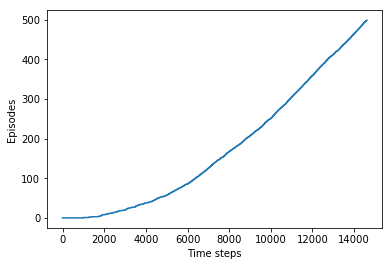

['R', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'U', 'U', 'R', 'D', 'R', 'D']
['R', 'U', 'R', 'R', 'R', 'R', 'D', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'D', 'L', 'G', 'L', 'D']
['D', 'D', 'D', 'R', 'D', 'D', 'U', 'D', 'L', 'L']
['L', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'L', 'D']
['L', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [2]:
from __future__ import print_function
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure()
plt.plot(episodes)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])

1.1 Modifique la implementación anterior para que el agente aprenda la política óptima empleando Q-Learning. Mantenga la política empleada en la implementación (e-greedy).

1.2 Modifique la implementación anterior para que el agente aprenda la política óptima empleando Sarsa($\lambda$). Mantenga la política empleada en la implementación (e-greedy).

1.3 Compare la convergencia de la implementación original respecto a la implementación de Q-Learning y Sarsa($\lambda$) empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

1.4 Muestre el resultado de la política aprendida en cada caso.

1.5 Modifique la implementación en 1.2 empleando los King's Moves (Ver Figura Windy Gridworld).

1.6 Modifique la implementación en 1.2 asumiendo que la fuerza del viento varía de manera equiprobable entre el valor A  establecido originalmente y A+1, A-1, el cual se determina para cada transición efectuada.

1.7 Analice la convergencia de Sarsa($\lambda$) en 1.6 para 4 valores distintos de $\lambda$.